In [1]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals, five_two, read_datasets

In [2]:
x_train, x_test, y_train, y_test = read_datasets(
    'x_train.csv',
    'x_test.csv',
    'y_train.csv',
    'y_test.csv'
)

In [3]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model.joblib')

In [4]:
#1000 to 10.000 did not show significative differences
#size 2270 based on the paper: https://www.econstor.eu/bitstream/10419/67820/1/587473266.pdf
random_state_list = list(np.random.randint(low = 1,high=5000,size=2270))

## Linear Regression VS SVR

In [5]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.003335
Fold  2 score difference = -0.132111
Fold  1 score difference = -0.112742
Fold  2 score difference = -0.129562
Fold  1 score difference = -0.235012
Fold  2 score difference = -0.104680
Fold  1 score difference = -0.029242
Fold  2 score difference = -0.096055
Fold  1 score difference = -0.172113
Fold  2 score difference = -0.105608
Regression 1 mean score and stdev : 0.044218 + 0.075158
Regression 2 mean score and stdev : 0.155597 + 0.047330
Score difference mean + stdev : -0.111379 + 0.063210
t_value for the current test is 0.049986


mean_score_1 0.003452147470328808, std 0.11140616232071826
mean_score_2 0.1778464567529604, std 0.10011598007175834
Ttest_relResult(statistic=-99.68976835820372, pvalue=0.0)
P value menor ou igual a 0.05


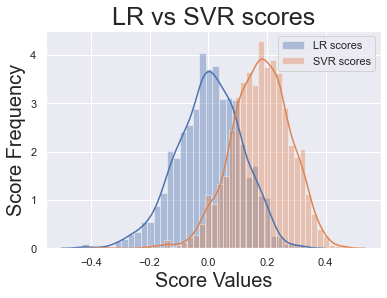

In [6]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'SVR')

In [7]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.22819653547362556
0.20603839173287458
-0.025434102702804662
0.3574592522427221


## Linear Regression VS XGBoost

In [8]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.019178
Fold  2 score difference = -0.175027
Fold  1 score difference = -0.119227
Fold  2 score difference = -0.119961
Fold  1 score difference = -0.183039
Fold  2 score difference = -0.082060
Fold  1 score difference = 0.020406
Fold  2 score difference = -0.094746
Fold  1 score difference = -0.168799
Fold  2 score difference = -0.089093
Regression 1 mean score and stdev : 0.044218 + 0.075158
Regression 2 mean score and stdev : 0.143455 + 0.040250
Score difference mean + stdev : -0.099237 + 0.068694
t_value for the current test is 0.233378


mean_score_1 0.003452147470328808, std 0.11140616232071826
mean_score_2 0.23304023230221613, std 0.057149570796083814
Ttest_relResult(statistic=-124.35604615001029, pvalue=0.0)
P value menor ou igual a 0.05


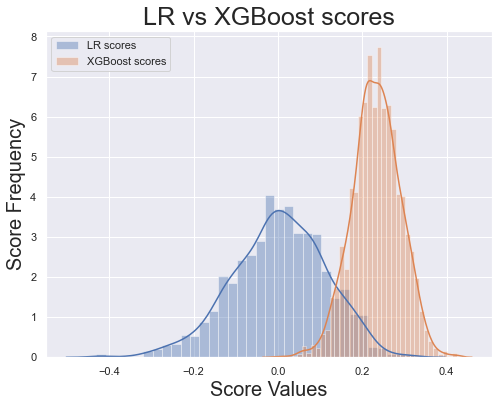

In [9]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'LR', 'XGBoost')

In [10]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.22819653547362556
0.20603839173287458
0.1216231292477354
0.34049178213151776


## SVR VS XGboost

In [11]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.015843
Fold  2 score difference = -0.042916
Fold  1 score difference = -0.006485
Fold  2 score difference = 0.009602
Fold  1 score difference = 0.051974
Fold  2 score difference = 0.022619
Fold  1 score difference = 0.049648
Fold  2 score difference = 0.001308
Fold  1 score difference = 0.003314
Fold  2 score difference = 0.016515
Regression 1 mean score and stdev : 0.155597 + 0.047330
Regression 2 mean score and stdev : 0.143455 + 0.040250
Score difference mean + stdev : 0.012142 + 0.025915
t_value for the current test is 0.595249


mean_score_1 0.1778464567529604, std 0.10011598007175834
mean_score_2 0.23304023230221613, std 0.057149570796083814
Ttest_relResult(statistic=-40.387941561572, pvalue=3.3186672355036665e-269)
P value menor ou igual a 0.05


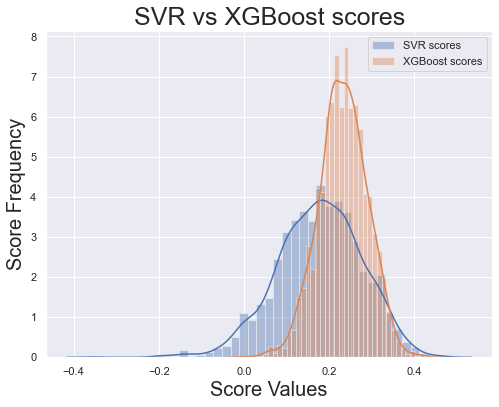

In [12]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [13]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.025434102702804662
0.3574592522427221
0.1216231292477354
0.34049178213151776


mean_score_1 -0.6653879465773367, std 0.20279903655561304
mean_score_2 -0.5535851704647416, std 0.11576451520232361
Ttest_relResult(statistic=-40.387941561572006, pvalue=3.318667235503289e-269)
P value menor ou igual a 0.05


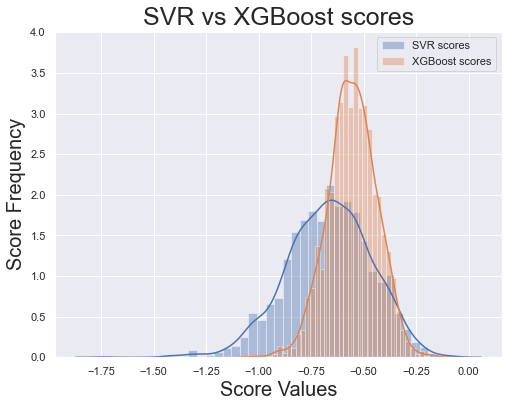

In [14]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    metric="adj_r2",
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [15]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-1.077161387526194
-0.3015568993032039
-0.7792762253699718
-0.3359269028617973
